<a href="https://colab.research.google.com/github/chandantm2002/DDoS-Cyber-Threat-Detection-/blob/main/DDoS_ML_AI_TTSData_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
DrDoS_DNS_data_1_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_DNS_data_1_per.csv')
DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_LDAP_data_2_0_per.csv')
DrDoS_MSSQL_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_MSSQL_data_1_3_per.csv')
DrDoS_NetBIOS_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_NetBIOS_data_1_3_per.csv')
DrDoS_NTP_data_data_5_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_NTP_data_data_5_per.csv')
DrDoS_SSDP_data_2_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_SSDP_data_2_per.csv')
DrDoS_UDP_data_2_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_UDP_data_2_per.csv')
Syn_data_4_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/syn_data.csv')
UDPLag_data_2_0_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/UDPLag_data_2_0_per.csv')

<ipython-input-8-9e16c8dffdb7>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_DNS_data_1_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_DNS_data_1_per.csv')
<ipython-input-8-9e16c8dffdb7>:2: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_LDAP_data_2_0_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_LDAP_data_2_0_per.csv')
<ipython-input-8-9e16c8dffdb7>:3: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_MSSQL_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_MSSQL_data_1_3_per.csv')
<ipython-input-8-9e16c8dffdb7>:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_NetBIOS_data_1_3_per = pd.read_csv('/content/drive/My Drive/DDos_Dataset/DrDoS_NetBIOS_data_1_3_per.csv')
<ipython-input-8-9e16c8dff

In [9]:
# Merge all the Dataset to make one data
data = pd.concat([DrDoS_DNS_data_1_per, DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_NetBIOS_data_1_3_per, DrDoS_NTP_data_data_5_per, DrDoS_SSDP_data_2_per, DrDoS_UDP_data_2_per, Syn_data_4_per, UDPLag_data_2_0_per], ignore_index = True)

In [10]:
data.shape

(613890, 89)

In [11]:
data[' Label'].value_counts()

,count
Label,
DrDoS_DNS,126779
DrDoS_MSSQL,113062
DrDoS_NetBIOS,102334
DrDoS_UDP,78380
DrDoS_SSDP,65270
DrDoS_LDAP,54496
Syn,34505
DrDoS_NTP,30058
UDP-lag,8266


In [12]:
# Drop Unnamed:0, Unnamed:0.1 columns
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

In [13]:
data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [14]:
data_real = data.replace(np.inf, np.nan)

In [15]:
data_real.isnull().sum().sum()

27386

In [16]:
data_df = data_real.dropna(axis=0)

In [17]:
data_df.isnull().sum().sum()

0

In [18]:
data_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613885,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
613886,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
613887,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
613888,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [19]:
# data_df.to_csv('data_final.csv', index = False)
# from google.colab import files
# files.download('data_final.csv')

In [20]:
data_X = data_df.drop([' Label', 'SimillarHTTP'], axis = 1)

In [21]:
data_X.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [22]:
data_X.shape

(600197, 85)

In [23]:
data_y = data_df[' Label']

In [24]:
data_y.shape

(600197,)

In [25]:
data_df.isnull().sum().sum()

0

In [26]:
data_y.unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn',
       'UDP-lag', 'WebDDoS'], dtype=object)

In [27]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,172.16.0.5-192.168.50.1-702-19002-17,172.16.0.5,702,192.168.50.1,19002,17,2018-12-01 11:08:37.221226,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.16.0.5-192.168.50.1-647-55666-17,172.16.0.5,647,192.168.50.1,55666,17,2018-12-01 11:11:35.264967,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,172.16.0.5-192.168.50.1-564-64440-17,172.16.0.5,564,192.168.50.1,64440,17,2018-12-01 11:14:31.706047,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,172.16.0.5-192.168.50.1-662-57255-17,172.16.0.5,662,192.168.50.1,57255,17,2018-12-01 11:07:46.876001,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,172.16.0.5-192.168.50.1-676-32822-17,172.16.0.5,676,192.168.50.1,32822,17,2018-12-01 11:13:59.869883,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613885,172.16.0.5-192.168.50.1-59112-59112-17,172.16.0.5,59112,192.168.50.1,59112,17,2018-12-01 13:11:27.719229,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613886,172.16.0.5-192.168.50.1-45040-22860-6,172.16.0.5,45040,192.168.50.1,22860,6,2018-12-01 13:30:03.415687,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613887,172.16.0.5-192.168.50.1-36575-18862-6,172.16.0.5,36575,192.168.50.1,18862,6,2018-12-01 13:30:13.838633,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613888,172.16.0.5-192.168.50.1-63440-63440-6,172.16.0.5,63440,192.168.50.1,63440,6,2018-12-01 13:30:00.104494,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Label Encoding for the Dataset

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
data_y_trans = le.fit_transform(data_y)

In [31]:
data_y_trans

array([1, 1, 1, ..., 9, 9, 9])

In [32]:
le_fid = LabelEncoder()

In [33]:
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [34]:
le_SIP = LabelEncoder()

In [35]:
le_SIP.fit(data_X[' Source IP'])
data_X[' Source IP'] = le_SIP.fit_transform(data_X[' Source IP'])

In [36]:
le_DIP = LabelEncoder()

In [37]:
le_DIP.fit(data_X[' Destination IP'])
data_X[' Destination IP'] = le_DIP.fit_transform(data_X[' Destination IP'])

In [38]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])

In [39]:
data_X

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,427234,5,702,67,19002,17,61371,2,2,0,...,83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,382278,5,647,67,55666,17,98287,48,2,0,...,879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,268983,5,564,67,64440,17,134744,1,2,0,...,1472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,405546,5,662,67,57255,17,51215,1,2,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,413371,5,676,67,32822,17,128617,1,2,0,...,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613885,303685,5,59112,67,59112,17,558463,122,2,2,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613886,146396,5,45040,67,22860,6,562250,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613887,86312,5,36575,67,18862,6,563559,1,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
613888,370229,5,63440,67,63440,6,561803,2,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [40]:
data_X.dtypes

,0
Flow ID,int64
Source IP,int64
Source Port,int64
Destination IP,int64
Destination Port,int64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


### Feature Selection

In [41]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [42]:
model.feature_importances_

array([3.20163324e-02, 3.77267583e-04, 7.86040498e-02, 1.58500493e-04,
       1.21756590e-02, 1.25668204e-02, 3.04836344e-01, 2.48249003e-03,
       3.05480169e-03, 3.70930440e-05, 9.07253996e-03, 1.43289955e-05,
       3.75591193e-02, 6.47732299e-02, 5.11333063e-02, 3.46642890e-03,
       3.34131598e-05, 3.24494714e-05, 4.06887116e-05, 1.08764573e-05,
       3.26284483e-02, 9.54491476e-03, 2.39620016e-03, 1.67641945e-03,
       1.85257048e-03, 1.48216787e-03, 2.65581017e-03, 2.07795665e-03,
       1.93822779e-03, 1.73385156e-03, 1.92113723e-03, 4.04021354e-05,
       4.96843923e-05, 2.26161501e-05, 3.86075891e-05, 5.12471574e-05,
       2.41366514e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.59769927e-03, 3.74448347e-05, 1.11509067e-02, 1.00446605e-04,
       4.51216123e-02, 3.82201253e-02, 5.67106696e-02, 4.02307551e-03,
       1.83894903e-03, 0.00000000e+00, 3.67332211e-06, 1.53627266e-05,
       0.00000000e+00, 2.12043608e-02, 1.74510058e-04, 6.59739731e-05,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

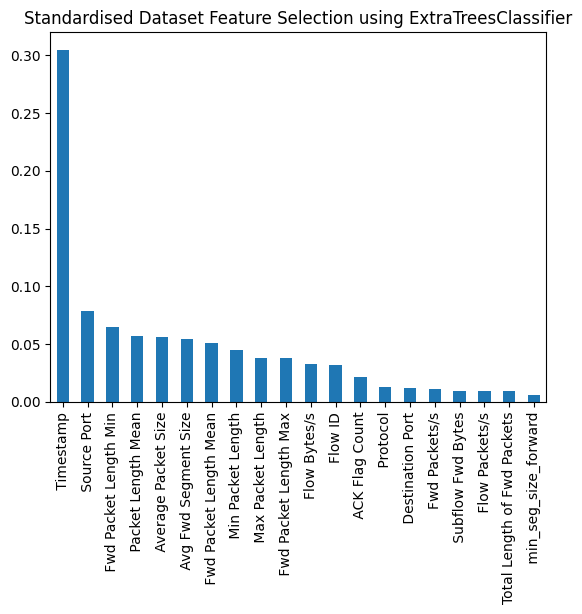

In [43]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [44]:
data_X.shape

(600197, 85)

In [45]:
data_new_20features_X = data_X[[' Timestamp', ' Source Port', ' Min Packet Length', ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' Destination Port', ' act_data_pkt_fwd']]

In [46]:
data_new_20features_X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
0,61371,702,1472.0,1472.0,427234,1472.0,1472.0,2208.0,0,1472.0,1472.0,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,19002,1
1,98287,647,1448.0,1448.0,382278,1448.0,1448.0,2172.0,0,1448.0,1448.0,6.033333e+07,1448.0,17,4.166667e+04,4.166667e+04,2896.0,2896,55666,1
2,134744,564,1472.0,1472.0,268983,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,64440,1
3,51215,662,1472.0,1472.0,405546,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,57255,1
4,128617,676,1472.0,1472.0,413371,1472.0,1472.0,2208.0,0,1472.0,1472.0,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,32822,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613885,558463,59112,520.0,1472.0,303685,1091.2,1472.0,1364.0,0,1472.0,1472.0,3.265574e+07,1472.0,17,1.639344e+04,3.278689e+04,2944.0,2944,59112,1
613886,562250,45040,0.0,0.0,146396,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,22860,0
613887,563559,36575,0.0,0.0,86312,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,2.000000e+06,2.000000e+06,0.0,0,18862,0
613888,561803,63440,0.0,0.0,370229,0.0,0.0,0.0,1,0.0,0.0,0.000000e+00,0.0,6,1.000000e+06,1.000000e+06,0.0,0,63440,0


### Train Test Split Normal dataset 84 Features

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [48]:
X_train.shape

(420137, 85)

In [49]:
X_test.shape

(180060, 85)

### Standardization of the 84 Feature Dataset

In [50]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

### Train Test Split 20 Feature Dataset

In [51]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

### Standardization of the 20 Feature Dataset

In [52]:
from sklearn.preprocessing import StandardScaler
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [53]:
X_train_std_20.shape

(420137, 20)

In [54]:
y_train_20.shape

(420137,)

In [55]:
X_test_std_20.shape

(180060, 20)

In [56]:
y_test_20.shape

(180060,)

### 1. Random Forest Classification

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)


RandomForestClassifier()

In [58]:
rf_y_pred = rf.predict(X_test_std_20)

In [59]:
rf_y_pred

array([3, 5, 5, ..., 2, 3, 1])

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.97      1.00      0.98       222
    DrDoS_DNS       1.00      1.00      1.00     36750
   DrDoS_LDAP       1.00      1.00      1.00     16052
  DrDoS_MSSQL       1.00      1.00      1.00     33006
    DrDoS_NTP       1.00      1.00      1.00      9056
DrDoS_NetBIOS       1.00      1.00      1.00     29753
   DrDoS_SSDP       1.00      1.00      1.00     19334
    DrDoS_UDP       1.00      1.00      1.00     23058
          Syn       1.00      1.00      1.00     10351
      UDP-lag       0.98      0.96      0.97      2476
      WebDDoS       0.00      0.00      0.00         2

     accuracy                           1.00    180060
    macro avg       0.90      0.90      0.90    180060
 weighted avg       1.00      1.00      1.00    180060



In [62]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[  221     1     0     0     0     0     0     0     0     0     0]
 [    0 36729     8     0    13     0     0     0     0     0     0]
 [    2     3 16037     9     1     0     0     0     0     0     0]
 [    1     1     1 32969     0    33     1     0     0     0     0]
 [    0     1     0     0  9055     0     0     0     0     0     0]
 [    0     0     0     0     0 29751     0     2     0     0     0]
 [    2     1     0     4     0     0 19283    44     0     0     0]
 [    3     0     0     0     0     0     7 22998     0    48     2]
 [    0     0     0     0     0     0     0     1 10350     0     0]
 [    0     0     0     0     0     0     4    45    48  2379     0]
 [    0     0     0     0     0     0     0     0     0     2     0]]


In [63]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 99.84005331556148


In [64]:
# RoC curve Function

def RoC_Curve(classifier, X_val, y_val, title):
        """ RoC Curve for Classifier
        Parameters:
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph

        Note: Some part of this Method code is taken
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()



In [87]:
from keras.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

<ipython-input-89-910996accd76>:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


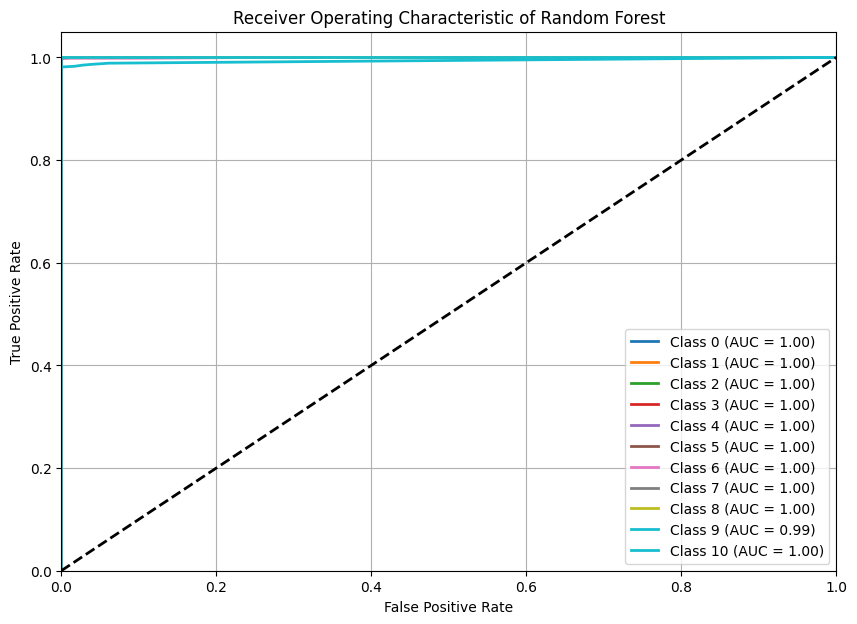

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from keras.utils import to_categorical

# One-hot encode your test labels
y_test_bin = to_categorical(y_test_20)
y_score = rf.predict_proba(X_test_std_20)

n_classes = y_test_bin.shape[1]

# Initialize FPR, TPR, AUC dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 7))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)


In [ ]:
dt_y_pred = dt.predict(X_test_std_20)

In [ ]:
print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))

In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)

In [ ]:
acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

In [ ]:
# RoC Curve
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

### 3. SVM

In [76]:
from sklearn.svm import LinearSVC

In [77]:
svm = LinearSVC(multi_class = 'ovr')
svm.fit(X_train_std_20, y_train_20)

LinearSVC()

In [78]:
y_pred_svm = svm.predict(X_test_std_20)

In [79]:
svm.score(X_test_std_20, y_test_20)

0.9146951016327891

In [80]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_svm)))

Classification Report for Random Forest: 
                precision    recall  f1-score   support

       BENIGN       0.95      0.80      0.87       222
    DrDoS_DNS       0.97      0.97      0.97     36750
   DrDoS_LDAP       0.93      0.96      0.94     16052
  DrDoS_MSSQL       0.81      0.93      0.87     33006
    DrDoS_NTP       0.99      0.95      0.97      9056
DrDoS_NetBIOS       0.94      0.99      0.96     29753
   DrDoS_SSDP       1.00      0.54      0.70     19334
    DrDoS_UDP       0.91      1.00      0.95     23058
          Syn       0.89      1.00      0.94     10351
      UDP-lag       0.88      0.36      0.51      2476
      WebDDoS       0.00      0.00      0.00         2

     accuracy                           0.91    180060
    macro avg       0.84      0.77      0.79    180060
 weighted avg       0.92      0.91      0.91    180060



In [81]:
svm_conf_mat = confusion_matrix(y_test_20, y_pred_svm)
print("SVM Confusion Matrix: \n", svm_conf_mat)

SVM Confusion Matrix: 
 [[  177     0     0    32     2     1     0    10     0     0     0]
 [    1 35646   350   364    84   279    13     0     0    13     0]
 [    0   616 15388    21     0    12     0     0     0    15     0]
 [    0     0   476 30723     0  1693    28     0     0    85     1]
 [    6   448     0    11  8591     0     0     0     0     0     0]
 [    1     0     7   319     0 29421     0     0     0     5     0]
 [    1     0   328  6504     0     9 10508  1984     0     0     0]
 [    0     0    35     0     0     6     8 23005     1     1     2]
 [    0     0     0     0     0     0     0     2 10349     0     0]
 [    0     0    32     0     0     0     0   336  1216   892     0]
 [    0     0     0     0     0     0     0     2     0     0     0]]


In [82]:
acc_score_svm = accuracy_score(y_test_20, y_pred_svm)
print("Accuracy Score for SVM: \n", acc_score_svm*100)

Accuracy Score for SVM: 
 91.46951016327891


In [84]:
# RoC Curve
# RoC curve Function

def RoC_Curve_SVM(classifier, X_val, y_val, title):
        """ RoC Curve for Classifier
        Parameters:
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph

        Note: Some part of this Method code is taken
            from Sklearn Website
        """

        lw = 2
        n_classes = 12
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.decision_function(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL', 'DrDoS_NTP', 'DrDoS_NetBIOS', 'DrDoS_SNMP', 'DrDoS_SSDP', 'DrDoS_UDP', 'Syn', 'UDP-lag', 'WebDDoS']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()


In [83]:
# RoC Curve
title = 'Receiver operating characteristic of SVM'
RoC_Curve_SVM(svm, X_test_std_20, y_test_20, title)

NameError: name 'RoC_Curve_SVM' is not defined

### 4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [ ]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))

In [ ]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)

In [ ]:
acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

In [ ]:
# RoC Curve
title = 'Receiver operating characteristic of Naive Bayes'
RoC_Curve(gnb, X_test_std_20, y_test_20, title)

### 5. MLP

In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
y_train_MLP_20 = np.array(y_train_20)
y_test_MLP_20 = np.array(y_test_20)

y_train_MLP_onehot_20 = to_categorical(y_train_MLP_20)
y_test_MLP_onehot_20 = to_categorical(y_test_MLP_20)

X_train_20_MLP = np.array(X_train_std_20)
X_test_20_MLP = np.array(X_test_std_20)

In [ ]:
# y_train_MLP = np.array(y_train)
# y_test_MLP = np.array(y_test)

# y_train_MLP_onehot = to_categorical(y_train_MLP)
# y_test_MLP_onehot = to_categorical(y_test_MLP)

# X_train_MLP = np.array(X_train_std)
# X_test_MLP = np.array(X_test_std)

In [ ]:
batch_size = 1000

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=20,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(2024,activation='relu'))
model.add(Dropout(0.01))
# model.add(Dense(3024,activation='relu'))
# model.add(Dropout(0.01))
# model.add(Dense(2500,activation='relu'))
# model.add(Dropout(0.01))
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.01))
model.add(Dense(12))
model.add(Activation('softmax'))
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [ ]:
# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])
model.fit(X_train_20_MLP, y_train_MLP_onehot_20, validation_data=(X_test_20_MLP, y_test_MLP_onehot_20),batch_size=batch_size, epochs=100,callbacks=[monitor])

In [ ]:
y_pred_MLP = model.predict_classes(X_test_20_MLP)

In [ ]:
y_pred_MLP

In [ ]:
print("Classification Report for MLP: \n", classification_report(le.inverse_transform(y_test_MLP_20), le.inverse_transform(y_pred_MLP)))

In [ ]:
mlp_conf_mat = confusion_matrix(y_test_20, y_pred_MLP)
print("MLP Confusion: \n", mlp_conf_mat)

In [ ]:
acc_score_mlp = accuracy_score(y_test_20, y_pred_MLP)
print("Accuracy Score for MLP: \n", acc_score_mlp*100)

In [ ]:
# RoC Curve
title = 'Receiver operating characteristic of MultiLayer Perceptron'
RoC_Curve(model, X_test_std_20, y_test_20, title)

### 6. LSTM

In [ ]:
y_train_lstm_20 = np.array(y_train_20)
y_test_lstm_20 = np.array(y_test_20)

y_train_onehot_lstm = to_categorical(y_train_lstm_20)
y_test_one_hot_lstm = to_categorical(y_test_lstm_20)

X_train_lstm_20 = np.array(X_train_std_20)
X_test_lstm_20 = np.array(X_test_std_20)

In [ ]:
X_test_std_20

In [ ]:
X_train_lstm_20.shape[0]

In [ ]:
X_train_lstm_reshape = np.reshape(X_train_std_20, (X_train_lstm_20.shape[0], 1,  X_train_lstm_20.shape[1]))
X_test_lstm_reshape = np.reshape(X_test_std_20, (X_test_lstm_20.shape[0], 1, X_test_lstm_20.shape[1]))

In [ ]:
 batch_size = 1000

# Initialize the network
model_LSTM = Sequential()
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=True))
model_LSTM.add(Dropout(0.1))
model_LSTM.add(LSTM(8,input_dim=20, return_sequences=False))
model_LSTM.add(Dropout(0.1))
model_LSTM.add(Dense(12))
model_LSTM.add(Activation('softmax'))

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [ ]:
model_LSTM.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_LSTM.fit(X_train_lstm_reshape, y_train_onehot_lstm, validation_data=(X_test_lstm_reshape, y_test_one_hot_lstm),batch_size=batch_size, epochs=50,callbacks=[monitor])

In [ ]:
y_perd_lstm = model_LSTM.predict_classes(X_test_lstm_reshape)

In [ ]:
print("Classification Report for LSTM: \n", classification_report(le.inverse_transform(y_test_lstm_20), le.inverse_transform(y_perd_lstm)))

In [ ]:
lstm_conf_mat = confusion_matrix(y_test_lstm_20, y_perd_lstm)
print("LSTM Confusion: \n", lstm_conf_mat)

In [ ]:
acc_score_lstm = accuracy_score(y_test_lstm_20, y_perd_lstm)
print("Accuracy Score for MLP: \n", acc_score_lstm*100)

In [ ]:
# RoC Curve
title = 'Receiver operating characteristic of LSTM'
RoC_Curve(model_LSTM, X_test_lstm_reshape, y_test_20, title)

### 7. XGBoost

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
# fit model no training data
gradinet_boost = GradientBoostingClassifier()
gradinet_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier()

In [68]:
# Predict the labels
y_pred_xgboost = gradinet_boost.predict(X_test_std_20)

In [69]:
y_pred_xgboost

array([3, 5, 5, ..., 2, 3, 1])

In [70]:
y_test_20

array([3, 5, 5, ..., 2, 3, 1])

In [71]:
# Accuracy Score
print("Accuracy Score for the XGBoost Classifier is: {0:.3f}%".format(accuracy_score(y_test_20, y_pred_xgboost)* 100))

Accuracy Score for the XGBoost Classifier is: 99.756%


In [72]:
# Classification Report
print("Classification Report for XGBOOST: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_xgboost)))

Classification Report for XGBOOST: 
                precision    recall  f1-score   support

       BENIGN       0.64      0.36      0.46       222
    DrDoS_DNS       1.00      1.00      1.00     36750
   DrDoS_LDAP       1.00      1.00      1.00     16052
  DrDoS_MSSQL       1.00      1.00      1.00     33006
    DrDoS_NTP       0.99      1.00      1.00      9056
DrDoS_NetBIOS       1.00      1.00      1.00     29753
   DrDoS_SSDP       1.00      1.00      1.00     19334
    DrDoS_UDP       1.00      1.00      1.00     23058
          Syn       1.00      1.00      1.00     10351
      UDP-lag       0.97      0.98      0.98      2476
      WebDDoS       0.00      0.00      0.00         2

     accuracy                           1.00    180060
    macro avg       0.87      0.85      0.86    180060
 weighted avg       1.00      1.00      1.00    180060



In [73]:
# Confusion Matrix
xgboost_conf_mat = confusion_matrix(y_test_20, y_pred_xgboost)
print("LSTM Confusion: \n", xgboost_conf_mat)


LSTM Confusion: 
 [[   81    16     5    10    67     7     5    11     0    18     2]
 [   19 36712     8     0    11     0     0     0     0     0     0]
 [    4     0 16041     7     0     0     0     0     0     0     0]
 [    0     0     0 32974     0    32     0     0     0     0     0]
 [    5     0     0     0  9051     0     0     0     0     0     0]
 [   16     0     0     0     0 29704    33     0     0     0     0]
 [    1     0     0     0     0     0 19280    53     0     0     0]
 [    1     0     0     0     0     0     0 23002     0    55     0]
 [    0     0     0     0     0     0     0     0 10348     0     3]
 [    0     0     0     0     0     0     0     0    47  2428     1]
 [    0     0     0     0     0     0     0     0     0     2     0]]


In [75]:
# RoC Curve
title = 'Receiver operating characteristic of XGBOOST'
RoC_Curve(gradinet_boost, X_test_std_20, y_test_20, title)

NameError: name 'to_categorical' is not defined

## Ensemble Method of Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# ADABOOST
adaboost = AdaBoostClassifier(base_estimator= dt, n_estimators=100)


In [ ]:
adaboost.fit(X_train_std_20, y_train_20)

In [ ]:
y_pred_adaboost = adaboost.predict(X_test_std_20)

In [ ]:
print("Accuracy Score for Adaboost: ", accuracy_score(y_test_20, y_pred_adaboost))

In [ ]:
print("Classification Report for Adaboost: ",classification_report(le.inverse_transform(y_test_20), le.inverse_transform(y_pred_adaboost)))

In [ ]:
# RoC Curve
title = 'Receiver operating characteristic of ADABOOST'
RoC_Curve(adaboost, X_test_std_20, y_test_20, title)

In [ ]:
# Confusion Matrix
adaboost_conf_mat = confusion_matrix(y_test_20, y_pred_adaboost)
print("Adaboost Confusion: \n", adaboost_conf_mat)

In [ ]:
# Generating output for each of the classifier for Comparision with Ensemble learning
clf_labels = ['Decision Tree', 'SVM']
# for clf, label in zip([dt, svm, gradinet_boost, adaboost], clf_labels):
#   scores = cross_val_score(estimator=clf, X = X_train_std_20, y = y_train_20, cv = 20, scoring = 'accuracy')
#   print("Accuracy: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std() * 2, label))

In [ ]:
# Using Majority Voting Technique for Ensemble classification

from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'}
      Default: 'classlabel'
      If 'classlabel' the prediction is based on
      the argmax of class labels. Else if
      'probability', the argmax of the sum of
      probabilities is used to predict the class label
      (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers]
      Optional, default: None
      If a list of `int` or `float` values are
      provided, the classifiers are weighted by
      importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers,
                 vote='classlabel', weights=None):


        self.classifiers = classifiers
        self.named_classifiers = {key: value for
                                  key, value in
                                  _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability'"
                             "or 'classlabel'; got (vote=%r)"
                             % self.vote)
        if self.weights and len(self.weights) != len(self.classifiers):
          raise ValueError("Number of classifiers and weights"
                             "must be equal; got %d weights,"
                             "%d classifiers"
                             % (len(self.weights),
                             len(self.classifiers)))
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                               self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    def predict(self, X):

        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.

        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote

            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in
                                      self.classifiers_]).T

            maj_vote = np.apply_along_axis(lambda x: np.argmax(
                                           np.bincount(x,
                                           weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Training vectors, where
            n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like,
            shape = [n_examples, n_classes]
            Weighted average probability for
            each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,
                               weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier,
                           self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(
                        deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [ ]:
mv_clf = MajorityVoteClassifier(classifiers = [dt, svm, gradinet_boost, adaboost], vote='classlabel')
clf_labels += ['Majority Voting']
all_clf = [dt, svm, mv_clf]


In [ ]:
for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf, X = X_train_std_20, y= y_train_20, cv = 10, scoring = 'accuracy')
  print("Accuracy Score: %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std()*2, label))

### Ouptut for
mv_clf = MajorityVoteClassifier(classifiers = [dt, svm, gradinet_boost, adaboost], vote='classlabel')
clf_labels += ['Majority Voting']
all_clf = [dt, svm, mv_clf]

output:

### Accuracy Score: 1.00 (+/- 0.00) [Decision Tree]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)

### Accuracy Score: 0.93 (+/- 0.00) [SVM]

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)

### Accuracy Score: 1.00 (+/- 0.00) [Majority Voting]


